### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [4]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

%load_ext autoreload
%autoreload 2
%matplotlib inline
sns.set()

### Load Data

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [6]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv')

In [7]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
df.agg(["nunique", "unique", lambda x:x.isna().sum(), "dtypes"]).T

,nunique,unique,<lambda>,dtypes
name,2058,"[Maruti Swift Dzire VDI, Skoda Rapid 1.5 TDI A...",0,object
year,29,"[2014, 2006, 2010, 2007, 2017, 2001, 2011, 201...",0,int64
selling_price,677,"[450000, 370000, 158000, 225000, 130000, 44000...",0,int64
km_driven,921,"[145500, 120000, 140000, 127000, 45000, 175000...",0,int64
fuel,4,"[Diesel, Petrol, LPG, CNG]",0,object
seller_type,3,"[Individual, Dealer, Trustmark Dealer]",0,object
transmission,2,"[Manual, Automatic]",0,object
owner,5,"[First Owner, Second Owner, Third Owner, Fourt...",0,object
mileage,393,"[23.4 kmpl, 21.14 kmpl, 17.7 kmpl, 23.0 kmpl, ...",221,object
engine,121,"[1248 CC, 1498 CC, 1497 CC, 1396 CC, 1298 CC, ...",221,object


In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Cleaning Data and modifying Features

In [11]:
#Adding car brand feature
df['brand']=df['name'].apply(lambda x: x.split()[0])
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [12]:
#ordinally encoding fuel, seller type and transmission
ord_enc = OrdinalEncoder()
ord_enc.fit(df[['fuel', 'seller_type', 'transmission']])
df[['fuel', 'seller_type', 'transmission']] = ord_enc.transform(df[['fuel', 'seller_type', 'transmission']])

In [13]:
df2 = df.copy()

In [14]:
#Cleaning engine and mileage values
df['engine']=df['engine'].astype(str).apply(lambda x: x.split()[0]).astype(float)
df['mileage']=df['mileage'].astype(str).apply(lambda x: x.split()[0]).astype(float)
#Cleaning max_power value
df['max_power']=df['max_power'].astype(str).apply(lambda x: x[:-3])
df['max_power']=df['max_power'].replace('', np.nan)
df['max_power']=df['max_power'].replace(' ', np.nan)
df['max_power']=df['max_power'].astype(float)

In [15]:
#Ordinally encoding Owner
df['owner']=df['owner'].apply(lambda x: x.split()[0])
df['owner'].replace({'First':0, 'Second':1, 'Third':2, 'Fourth':3, 'Test':4}, inplace=True)

In [16]:
df['owner'].unique()

array([0, 1, 2, 3, 4])

In [17]:
#extracting numeric data from torque using regex
import re
def get_nums(s):
    s=s.replace(',', '')
    res = re.findall(r"\d*\.?\d+|\d+", s)
    return res
def get_torque(s):
    try:
        res = get_nums(s)
        if('kgm' in s):
            return 10.0*float(res[0])
        else:
            return float(res[0])
    except:
        return np.nan
def get_rpm(s):
    try:
        res = get_nums(s)
        if(len(res)>2):
            rpm = (float(res[1])+float(res[2]))/2
        else:
            rpm = float(res[1])
        return rpm
    except:
        return np.nan
def get_units(s):
    return 'kgm' in s

In [18]:
df['rpm']=df['torque'].apply(get_rpm)
df['torque']=df['torque'].apply(get_torque)

In [19]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,1.0,1.0,1.0,0,23.40,1248.0,74.00,190.0,5.0,Maruti,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1.0,1.0,1.0,1,21.14,1498.0,103.52,250.0,5.0,Skoda,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,3.0,1.0,1.0,2,17.70,1497.0,78.00,127.0,5.0,Honda,2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1.0,1.0,1.0,0,23.00,1396.0,90.00,224.0,5.0,Hyundai,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,3.0,1.0,1.0,0,16.10,1298.0,88.20,115.0,5.0,Maruti,4500.0


In [20]:
df2 = df.copy()

In [21]:
#dropping name
df2.drop(['name'], axis=1, inplace=True)

In [22]:
#one-hot encoding brands
ohe = OneHotEncoder()
encoded_brand = ohe.fit_transform(df2[['brand']])
df2 = pd.concat([df2.drop(['brand'], axis=1), pd.DataFrame(encoded_brand.toarray())], axis=1)

In [23]:
scaler = StandardScaler()
cols_to_scale = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'rpm']
scaler.fit(df2[cols_to_scale])
df2[cols_to_scale]=scaler.transform(df2[cols_to_scale])

In [24]:
df2.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,22,23,24,25,26,27,28,29,30,31
0,0.048464,-0.233529,1.338363,1.0,1.0,1.0,0,0.986209,-0.418003,-0.492024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048464,-0.332759,0.887411,1.0,1.0,1.0,1,0.426372,0.078143,0.333827,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.929775,-0.595720,1.241098,3.0,1.0,1.0,2,-0.425769,0.076158,-0.380120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.940656,-0.512615,1.011202,1.0,1.0,1.0,0,0.887123,-0.124284,-0.044408,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.682495,-0.630451,0.887411,3.0,1.0,1.0,0,-0.822114,-0.318774,-0.094765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exploratory Data Analysis

<Axes: >

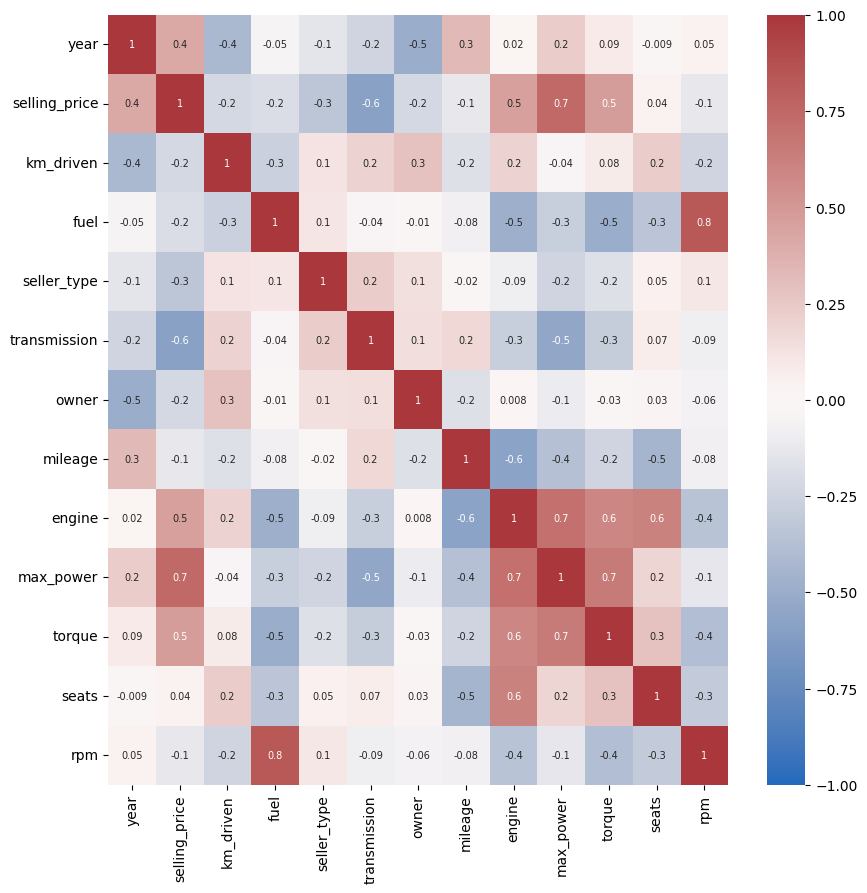

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.drop(['name', 'brand'], axis=1).corr(), annot=True, cmap='vlag', annot_kws={'fontsize':7}, fmt='.1g', vmin=-1, vmax=1, center= 0)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


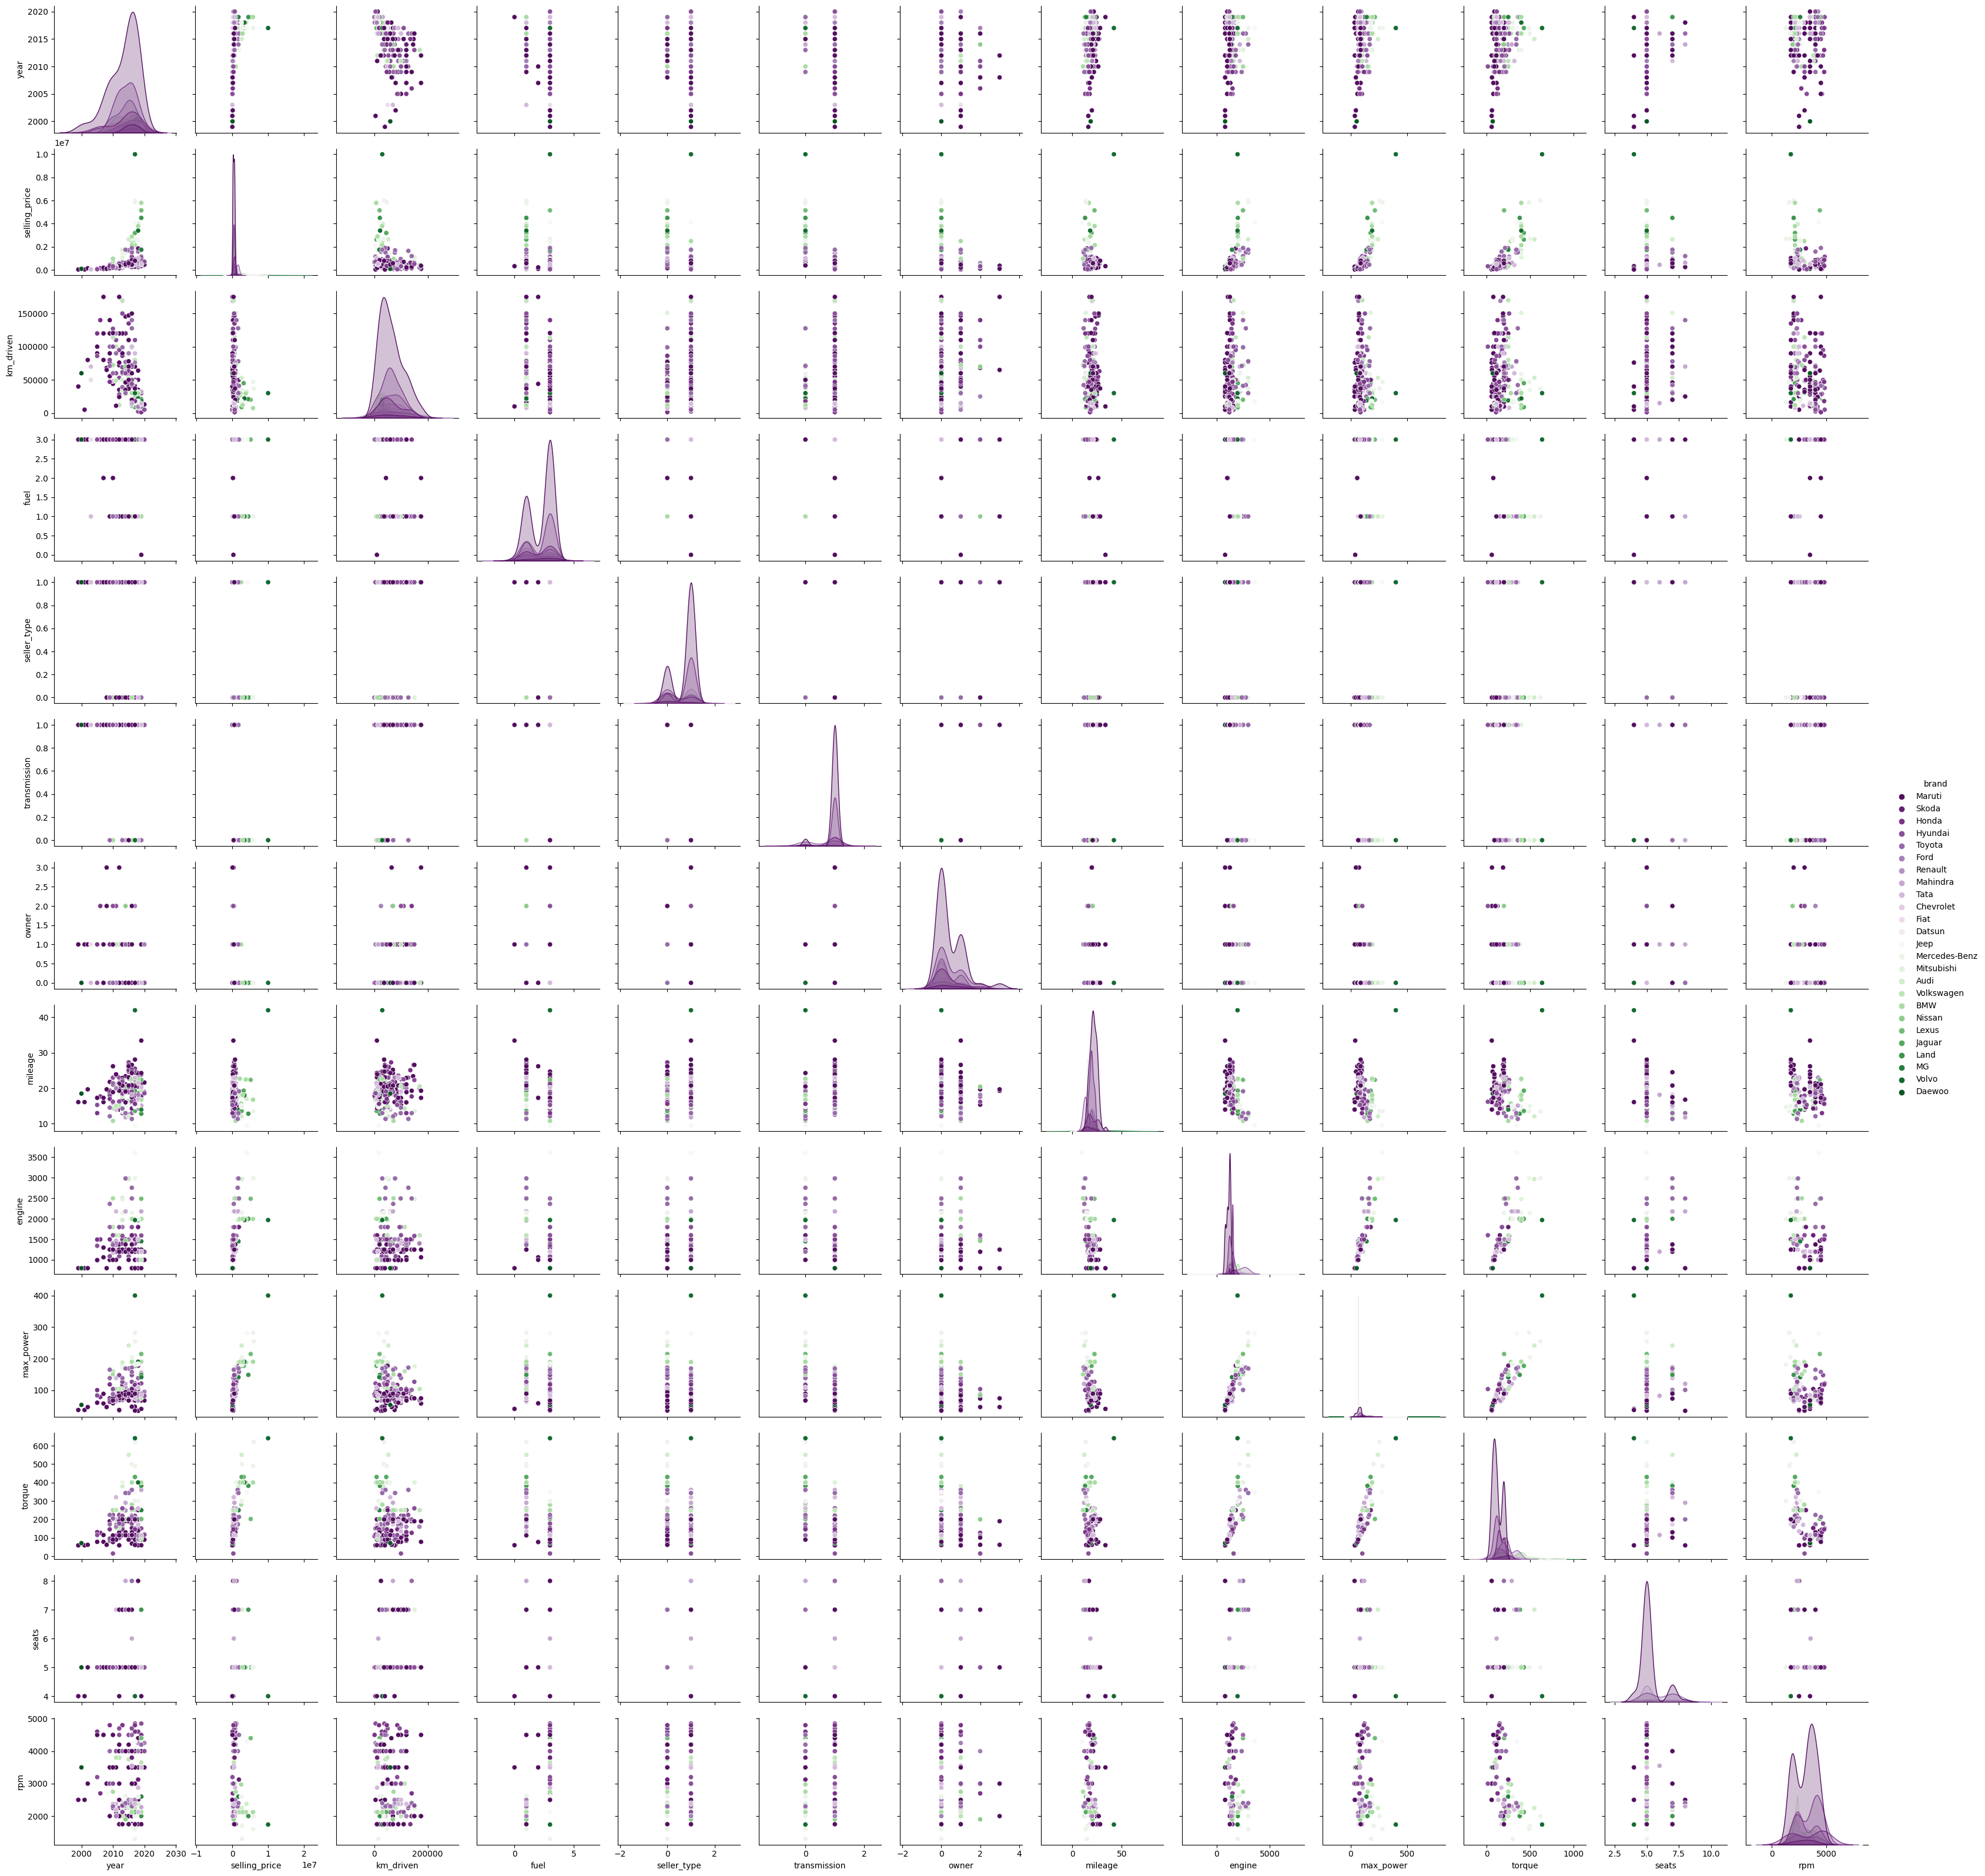

In [26]:
sns.pairplot(df.iloc[:200], palette='PRGn', hue='brand')

<Axes: xlabel='brand', ylabel='selling_price'>

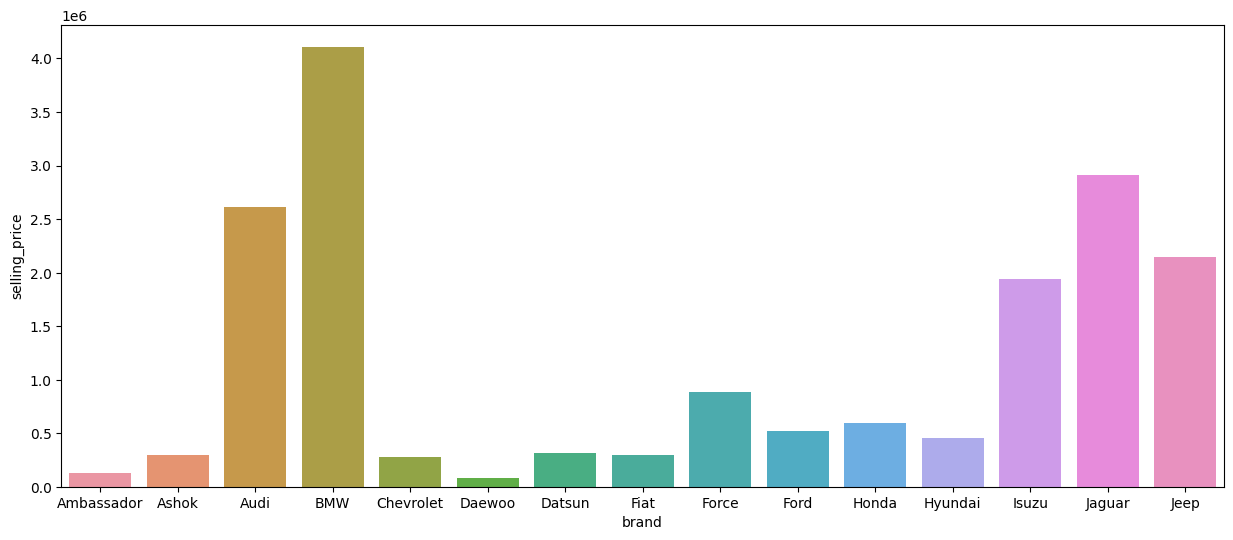

In [27]:
df3 = df.drop(['name'], axis=1).groupby('brand').agg('mean').reset_index()
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=df3[:15], x='brand', y='selling_price', ax=ax)

<Axes: xlabel='brand', ylabel='selling_price'>

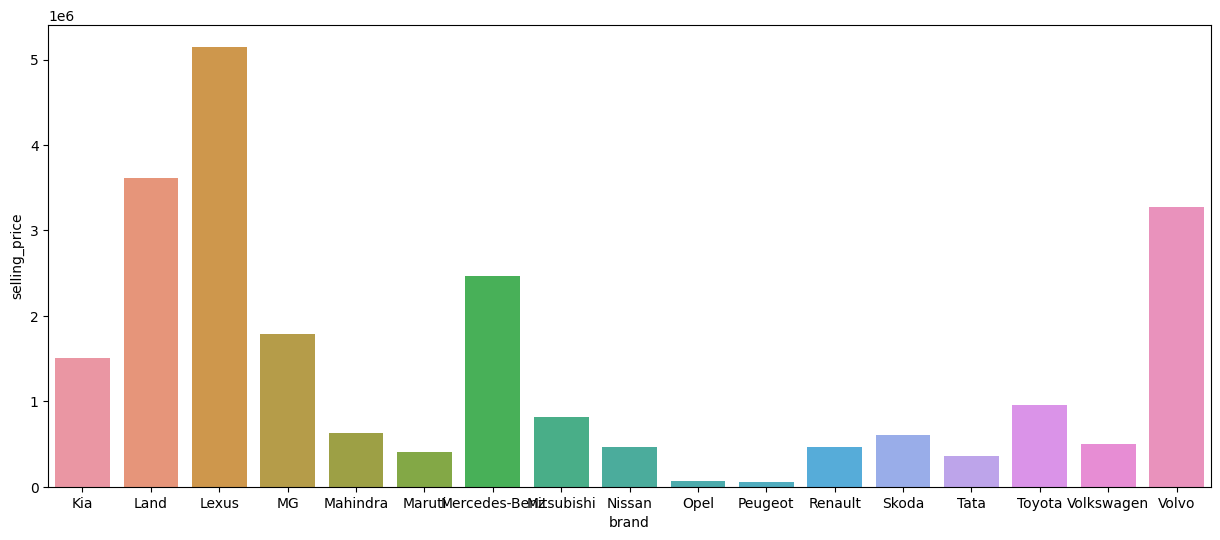

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=df3[15:], x='brand', y='selling_price', ax=ax)

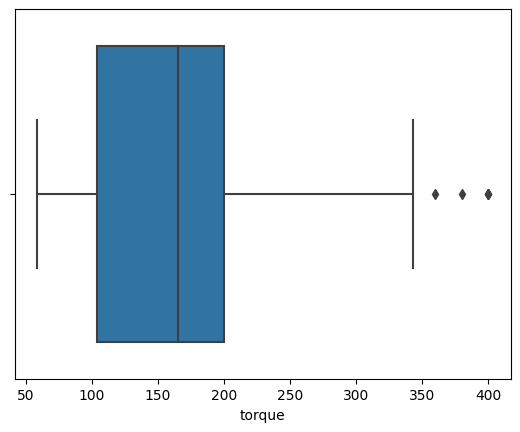

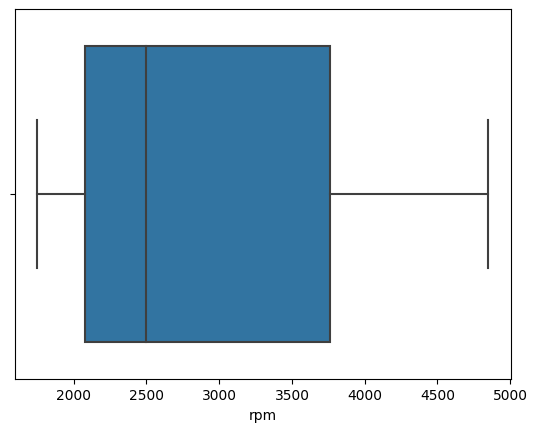

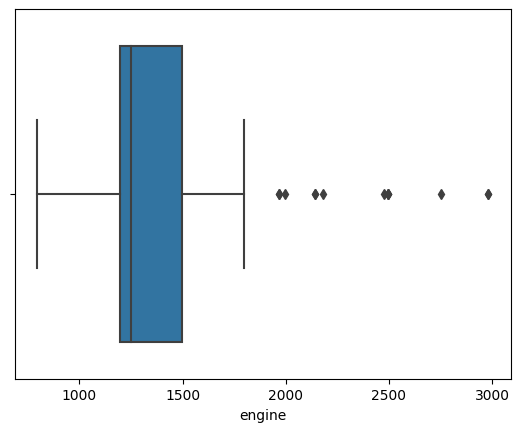

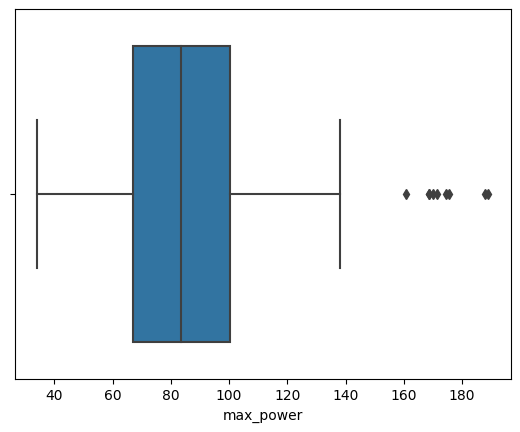

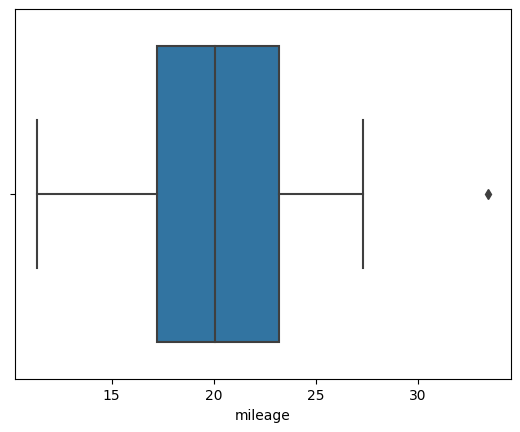

In [29]:
#checking distribution of newly added features
dist_feat = ['torque', 'rpm', 'engine', 'max_power', 'mileage']
for i in dist_feat:
    plt.figure(i)
    sns.boxplot(x=i, data=df.drop(['name'], axis=1).iloc[:100])

### Train-Test Split

In [30]:
df = df2

In [31]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,22,23,24,25,26,27,28,29,30,31
0,0.048464,-0.233529,1.338363,1.0,1.0,1.0,0,0.986209,-0.418003,-0.492024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048464,-0.332759,0.887411,1.0,1.0,1.0,1,0.426372,0.078143,0.333827,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.929775,-0.595720,1.241098,3.0,1.0,1.0,2,-0.425769,0.076158,-0.380120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.940656,-0.512615,1.011202,1.0,1.0,1.0,0,0.887123,-0.124284,-0.044408,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.682495,-0.630451,0.887411,3.0,1.0,1.0,0,-0.822114,-0.318774,-0.094765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
Y = df['selling_price'].values
X = df.drop(['selling_price'], axis=1).values

In [33]:
#imputation
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
X = imputer.fit_transform(X)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, shuffle=True)
x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, train_size=0.9)

### Baseline Model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [36]:
def baselineRegressionAccuracy(x_train, y_train, x_v, y_v):
    models = [LinearRegression, Ridge, Lasso, ElasticNet, DecisionTreeRegressor, RandomForestRegressor]
    names = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor']
    j=0
    for i in models:
        model = i()
        model.fit(x_train, y_train)
        print(names[j], model.score(x_v, y_v))
        j+=1

In [37]:
baselineRegressionAccuracy(x_train, y_train, x_cv, y_cv)

LinearRegression 0.8517299347895022
Ridge 0.8494797059499658
Lasso -0.00019536327573188572
ElasticNet 0.19258539048221013
DecisionTreeRegressor 0.9587650025197869
RandomForestRegressor 0.968986625908108


### Random Forest Regressor

In [38]:
model = RandomForestRegressor()

In [39]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [40]:
model.score(X_test, Y_test)

0.9841714882332123

The model has achieved an R2 score of 0.9862 

### HyperParameter Tuning

Since we'll only be looking at a small pool of parameters to select from, we can use a randomized search here using sktlearn's RandomizedSearchCV  

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
n_estimators = [int(x) for x in np.linspace(start = 75, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [75, 122, 169, 216, 263, 311, 358, 405, 452, 500]}


In [42]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=5, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [75, 122, 169, 216, 263,
                                                         311, 358, 405, 452,
                                                         500]},
                   random_state=42, verbose=5)

In [43]:
rf_random.best_params_

{'n_estimators': 311,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [44]:
optim_model_randm = rf_random.best_estimator_

In [45]:
optim_model_randm.score(X_test, Y_test)

0.9840635229613025

### XGBoost

In [46]:
! pip install xgboost

In [47]:
from xgboost import XGBRegressor

In [48]:
model = XGBRegressor()

In [49]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [50]:
model.score(X_test, Y_test)

0.9862609531996606

[CV 1/10] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=263;, score=0.969 total time=   3.2s
[CV 6/10] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=263;, score=0.952 total time=   2.9s
[CV 10/10] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=263;, score=0.973 total time=   3.0s
[CV 4/10] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=405;, score=0.968 total time=  16.9s
[CV 8/10] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=405;, score=0.957 total time=  18.2s
[CV 2/10] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.960 total time=   0.6s
[CV 4/10] END bootstrap=True, max_depth=50, max_features=sqrt, mi

We have achieved an accuracy of 0.9824 with XGBRegressor which provides an improvement over the previous Random Forest Regressor